# Import packages and datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales_train_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_train_validation.csv')

# Filter test data

In [4]:
sales_train_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [5]:
list_cols_drop = ['d_{0}'.format(i) for i in range(1900, 1914)]

In [6]:
sales_train_val = sales_train_val.drop(columns=list_cols_drop)

In [7]:
sales_train_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,4,2,3,0,1,2
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,1,2,1,3,1,0,2,5,4
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,4,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,1,1,2,0,0,0,0,1,1
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,1,1,2,1,4,0,0,2,2
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,1,2,1,1,1,1,2


# Get sales data of Hobbies in California stores

In [8]:
df_ca_hobbies = sales_train_val[(sales_train_val['state_id'] == 'CA') & (sales_train_val['cat_id'] == 'HOBBIES')]

In [9]:
df_ca_category = df_ca_hobbies.copy()

df_ca_category.drop(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], axis = 1, inplace=True)
df_ca_category = pd.melt(df_ca_category, id_vars=['id'])
df_ca_category['Date'] = df_ca_category['variable'].str[2:].astype('int')

dict_date = {}
for i in range(1, 1914):
    dict_date.update({i: (pd.to_datetime('28/01/2011', format='%d/%m/%Y') + pd.to_timedelta(i, unit='D'))})
    
df_ca_category['Date'] = df_ca_category['Date'].map(dict_date)

df_ca_category = df_ca_category[['Date', 'id', 'value']]

In [10]:
df_ca_category

,Date,id,value
0,2011-01-29,HOBBIES_1_001_CA_1_validation,0
1,2011-01-29,HOBBIES_1_002_CA_1_validation,0
2,2011-01-29,HOBBIES_1_003_CA_1_validation,0
3,2011-01-29,HOBBIES_1_004_CA_1_validation,0
4,2011-01-29,HOBBIES_1_005_CA_1_validation,0
...,...,...,...
4291735,2016-04-10,HOBBIES_2_145_CA_4_validation,0
4291736,2016-04-10,HOBBIES_2_146_CA_4_validation,0
4291737,2016-04-10,HOBBIES_2_147_CA_4_validation,0
4291738,2016-04-10,HOBBIES_2_148_CA_4_validation,0


# Coefficient of Variance Squared (CV2)

In [11]:
df_ca_category_1 = df_ca_category[df_ca_category['value'] != 0]

In [12]:
cv_data = df_ca_category_1.groupby('id').agg(average=('value','mean'),
                                 sd=('value','std')).reset_index()

cv_data['cv_sqr'] = (cv_data['sd'] / cv_data['average'])**2

In [13]:
cv_data

,id,average,sd,cv_sqr
0,HOBBIES_1_001_CA_1_validation,1.424757,0.739348,0.269288
1,HOBBIES_1_001_CA_2_validation,1.480447,0.780295,0.277800
2,HOBBIES_1_001_CA_3_validation,1.632967,0.875141,0.287211
3,HOBBIES_1_001_CA_4_validation,1.436782,0.766540,0.284635
4,HOBBIES_1_002_CA_1_validation,1.226933,0.596551,0.236403
...,...,...,...,...
2255,HOBBIES_2_148_CA_4_validation,1.380282,1.008703,0.534061
2256,HOBBIES_2_149_CA_1_validation,1.540984,1.234670,0.641957
2257,HOBBIES_2_149_CA_2_validation,1.619247,1.270796,0.615922
2258,HOBBIES_2_149_CA_3_validation,1.758427,1.387214,0.622355


# Average Demand Interval (ADI) per Product

In [14]:
prod_by_date = df_ca_category_1.groupby(['id','Date']).agg(count=('id','count')).reset_index()
skus = prod_by_date.id.value_counts()

In [15]:
from timeit import default_timer as timer
start = timer()

list_adi = list()
for i in range(len(skus.index)):
    a = prod_by_date[prod_by_date['id']==skus.index[i]]
    a['Previous_Date'] = a['Date'].shift(1)
    a['Duration'] = (a['Date'] - a['Previous_Date']).dt.days
    mean_temp = a.Duration.mean()
    list_adi.append([skus.index[i], mean_temp])

end = timer()
print('This line of code took {} minutes'.format((end-start) / 60))

This line of code took 3.1252483314166666 minutes


In [16]:
list_adi[:5]

[['HOBBIES_1_337_CA_3_validation', 1.0753541076487252],
 ['HOBBIES_1_254_CA_3_validation', 1.1028471818710053],
 ['HOBBIES_1_074_CA_3_validation', 1.108644859813084],
 ['HOBBIES_1_233_CA_3_validation', 1.1288782816229117],
 ['HOBBIES_1_209_CA_3_validation', 1.1378896882494005]]

In [17]:
ADI_df = pd.DataFrame(list_adi, columns=['id', 'ADI'])

In [18]:
ADI_df

,id,ADI
0,HOBBIES_1_337_CA_3_validation,1.075354
1,HOBBIES_1_254_CA_3_validation,1.102847
2,HOBBIES_1_074_CA_3_validation,1.108645
3,HOBBIES_1_233_CA_3_validation,1.128878
4,HOBBIES_1_209_CA_3_validation,1.137890
...,...,...
2255,HOBBIES_1_230_CA_4_validation,16.681818
2256,HOBBIES_1_412_CA_4_validation,48.227273
2257,HOBBIES_1_063_CA_4_validation,14.111111
2258,HOBBIES_1_026_CA_1_validation,57.571429


# MERGE CV2 AND ADI DATA

In [19]:
adi_cv = pd.merge(cv_data, ADI_df, on = 'id', how = 'inner')

In [20]:
adi_cv.isnull().sum()

id         0
average    0
sd         0
cv_sqr     0
ADI        0
dtype: int64

In [21]:
adi_cv

,id,average,sd,cv_sqr,ADI
0,HOBBIES_1_001_CA_1_validation,1.424757,0.739348,0.269288,2.425791
1,HOBBIES_1_001_CA_2_validation,1.480447,0.780295,0.277800,2.767507
2,HOBBIES_1_001_CA_3_validation,1.632967,0.875141,0.287211,2.178414
3,HOBBIES_1_001_CA_4_validation,1.436782,0.766540,0.284635,2.283410
4,HOBBIES_1_002_CA_1_validation,1.226933,0.596551,0.236403,4.355000
...,...,...,...,...,...
2255,HOBBIES_2_148_CA_4_validation,1.380282,1.008703,0.534061,12.723404
2256,HOBBIES_2_149_CA_1_validation,1.540984,1.234670,0.641957,5.868132
2257,HOBBIES_2_149_CA_2_validation,1.619247,1.270796,0.615922,4.466387
2258,HOBBIES_2_149_CA_3_validation,1.758427,1.387214,0.622355,5.853107


In [22]:
adi_cv.to_csv('ADI_CV_5_Year.csv')

In [23]:
def category(df):
    a=0

    if((df['ADI']<=1.32) & (df['cv_sqr']<=0.49)):
        a='Smooth'
    if((df['ADI']>=1.32) & (df['cv_sqr']>=0.49)):  
        a='Lumpy'
    if((df['ADI']<1.32) & (df['cv_sqr']>0.49)):
        a='Erratic'
    if((df['ADI']>1.32) & (df['cv_sqr']<0.49)):
        a='Intermittent'
    return a

In [24]:
adi_cv['category']=adi_cv.apply(category,axis=1)

In [25]:
adi_cv

,id,average,sd,cv_sqr,ADI,category
0,HOBBIES_1_001_CA_1_validation,1.424757,0.739348,0.269288,2.425791,Intermittent
1,HOBBIES_1_001_CA_2_validation,1.480447,0.780295,0.277800,2.767507,Intermittent
2,HOBBIES_1_001_CA_3_validation,1.632967,0.875141,0.287211,2.178414,Intermittent
3,HOBBIES_1_001_CA_4_validation,1.436782,0.766540,0.284635,2.283410,Intermittent
4,HOBBIES_1_002_CA_1_validation,1.226933,0.596551,0.236403,4.355000,Intermittent
...,...,...,...,...,...,...
2255,HOBBIES_2_148_CA_4_validation,1.380282,1.008703,0.534061,12.723404,Lumpy
2256,HOBBIES_2_149_CA_1_validation,1.540984,1.234670,0.641957,5.868132,Lumpy
2257,HOBBIES_2_149_CA_2_validation,1.619247,1.270796,0.615922,4.466387,Lumpy
2258,HOBBIES_2_149_CA_3_validation,1.758427,1.387214,0.622355,5.853107,Lumpy


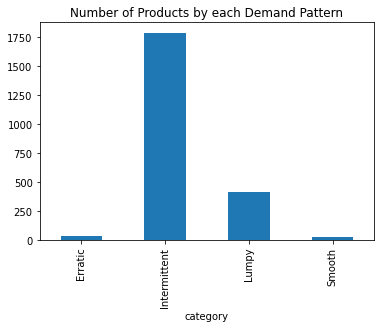

In [26]:
adi_cv.groupby('category')['id'].count().plot(kind='bar')
plt.title('Number of Products by each Demand Pattern')
plt.show()

In [27]:
list_intermittent = adi_cv[adi_cv['category'] == 'Intermittent']['id'].unique().tolist()
list_lumpy = adi_cv[adi_cv['category'] == 'Lumpy']['id'].unique().tolist()
list_smooth = adi_cv[adi_cv['category'] == 'Smooth']['id'].unique().tolist()
list_erratic = adi_cv[adi_cv['category'] == 'Erratic']['id'].unique().tolist()

In [28]:
pd.Series(list_intermittent).to_csv('Intermittent_ID_5_Year_Data.csv')
pd.Series(list_lumpy).to_csv('Lumpy_ID_5_Year_Data.csv')
pd.Series(list_smooth).to_csv('Smooth_ID_5_Year_Data.csv')
pd.Series(list_erratic).to_csv('Erratic_ID_5_Year_Data.csv')